In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('height-weight.csv')

In [29]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


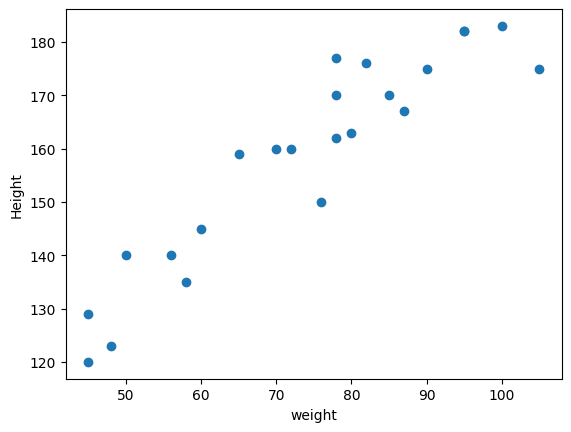

In [30]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("weight")
plt.ylabel("Height")
plt.show()

In [31]:
# Problem statement>> I want to predict height based on weight

In [32]:
X = df[['Weight']]
y = df['Height']

In [33]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [34]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [37]:
# scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler

StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
model

LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
model.coef_

array([17.7307072])

In [46]:
model.intercept_

160.0

In [47]:
model.predict(X_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

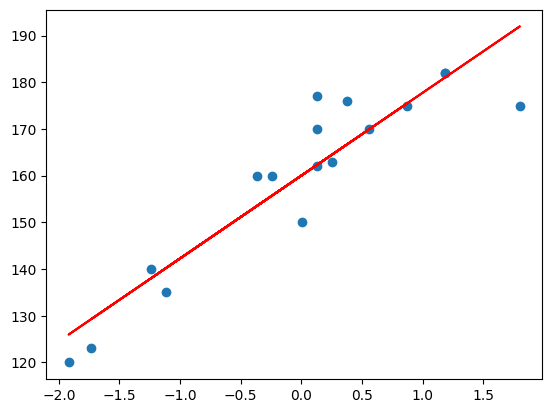

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), 'r')

In [49]:
y_pred_test = model.predict(X_test)

In [50]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

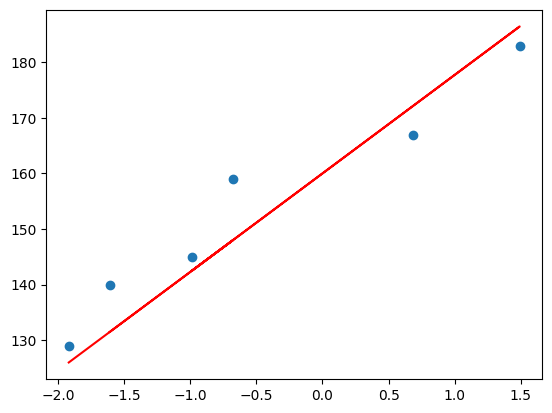

In [51]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')

In [55]:
# model performance/evaluation

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_test, y_pred_test)

41.285662830455514

In [57]:
mean_absolute_error(y_test,y_pred_test)

5.608571289304838

In [60]:
rsq = r2_score(y_test, y_pred_test)
rsq

0.8721036174256606

In [59]:
# adjusted rsquare 
# adjusted R2  = [1-(1-rsquare)*n-1/(n-p-1)] #n is no of observation and p is no of predictor variables

In [61]:
1-(1-rsq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1] - 1)

0.8401295217820757

In [62]:
# adjusted rsq will be always lesser than rqs

In [64]:
#assumption
#X-y should have linear relationship
#Observation should have no relation
#error should have constant variation
#error should be normally distributed
#features among themself should be least related

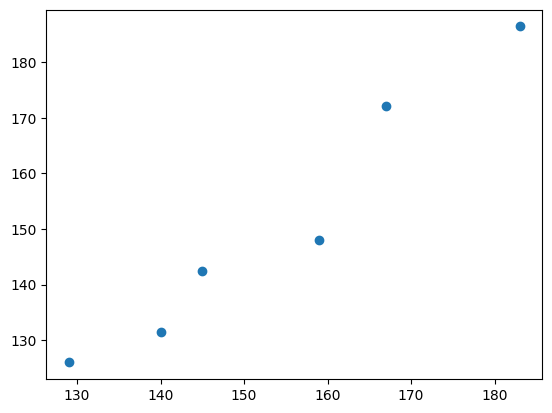

In [65]:
plt.scatter(y_test, y_pred_test)

In [66]:
# error should have constant variation
# error should be normally distributed
error = -y_pred_test + y_test
error

20     3.004281
17    11.024327
3      2.519316
13    -3.440591
19    -5.153621
16     8.509292
Name: Height, dtype: float64

C:\Users\Yash Gupta\AppData\Local\Temp\ipykernel_12304\2272085197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error) #approximately a normal distribution


<Axes: xlabel='Height', ylabel='Density'>

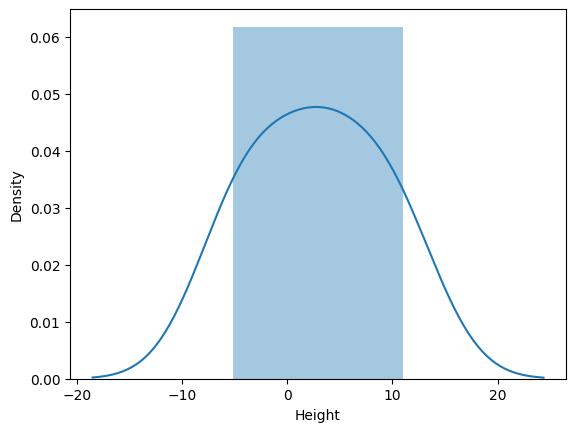

In [67]:
import seaborn as sns
sns.distplot(error) #approximately a normal distribution

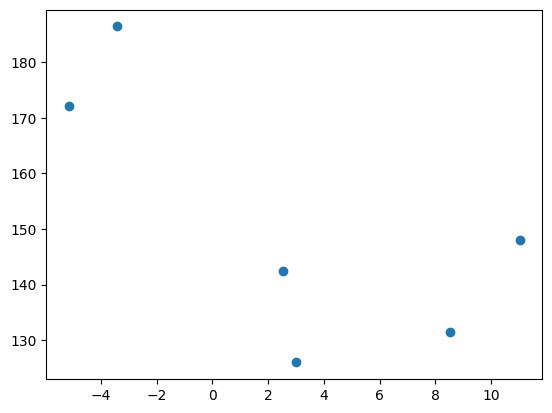

In [68]:
# to check constant variance
plt.scatter(error, y_pred_test)